In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
from src.pyth.preprocessing import *

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

normalizing counts per cell
    finished (0:00:05)


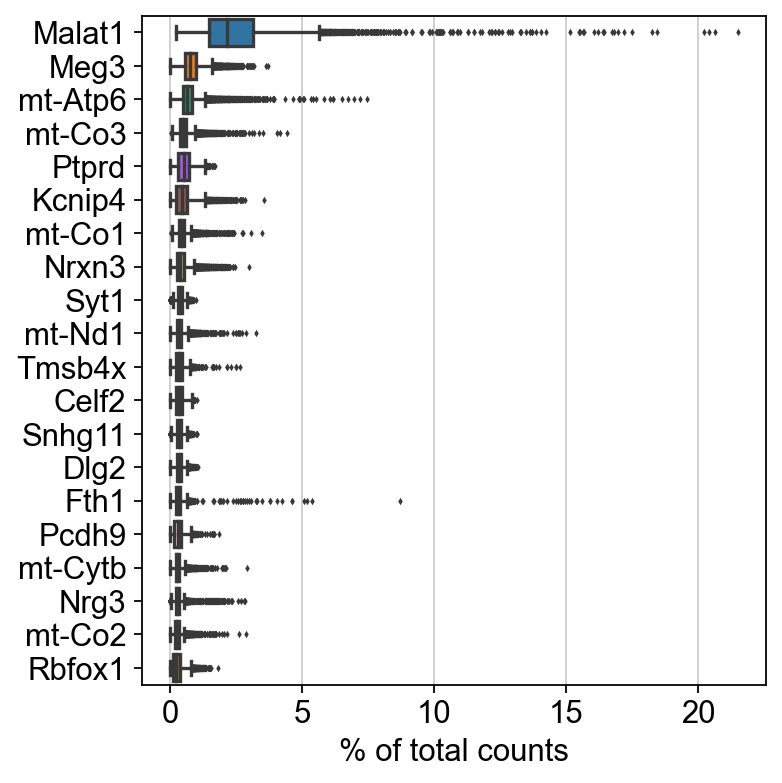

In [2]:
adata = prepare_adata("dataset/cortex/brain_mouse_raw.csv")
sc.pl.highest_expr_genes(adata, n_top=20, )

In [3]:
sc.pp.filter_cells(adata, min_genes=200)

In [4]:
sc.pp.filter_genes(adata, min_cells=5)

filtered out 8625 genes that are detected in less than 5 cells


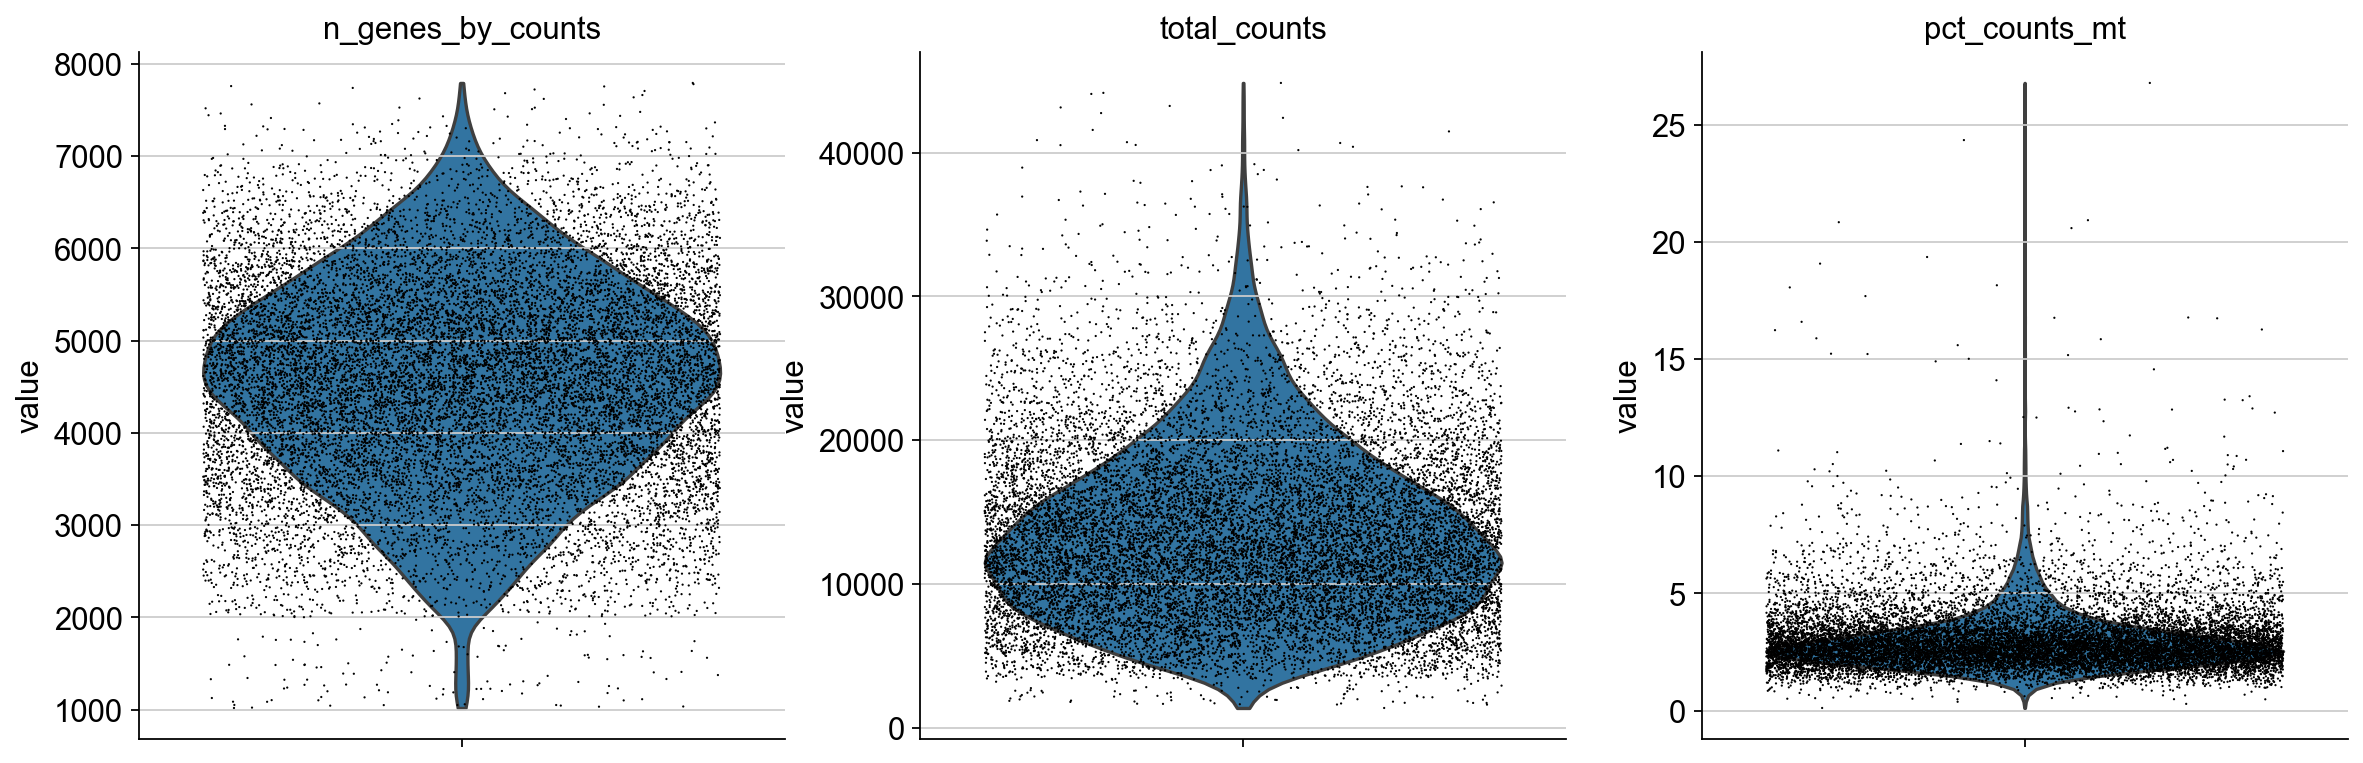

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

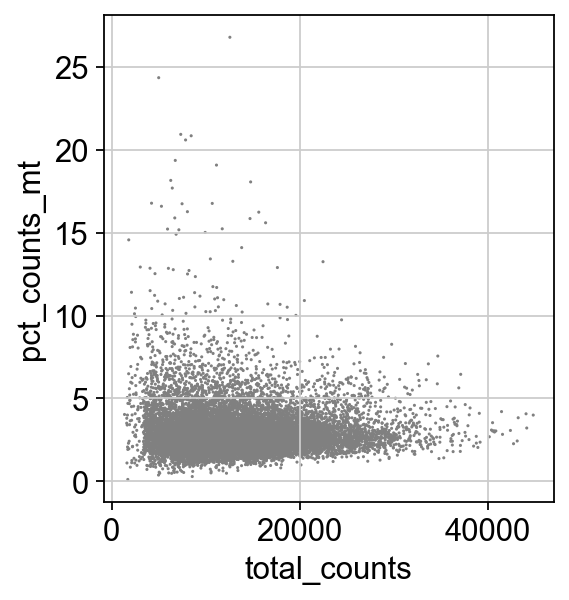

In [6]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

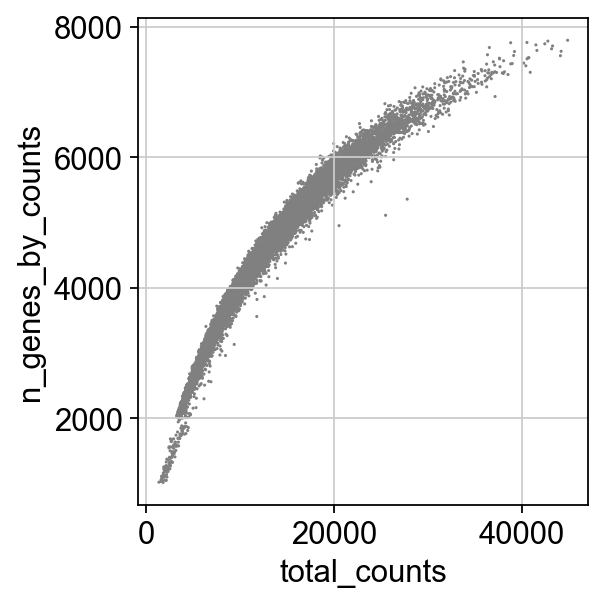

In [7]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [8]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [9]:
adata.write("dataset/cortex/brain_mouse_clean.h5ad", compression="gzip")

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

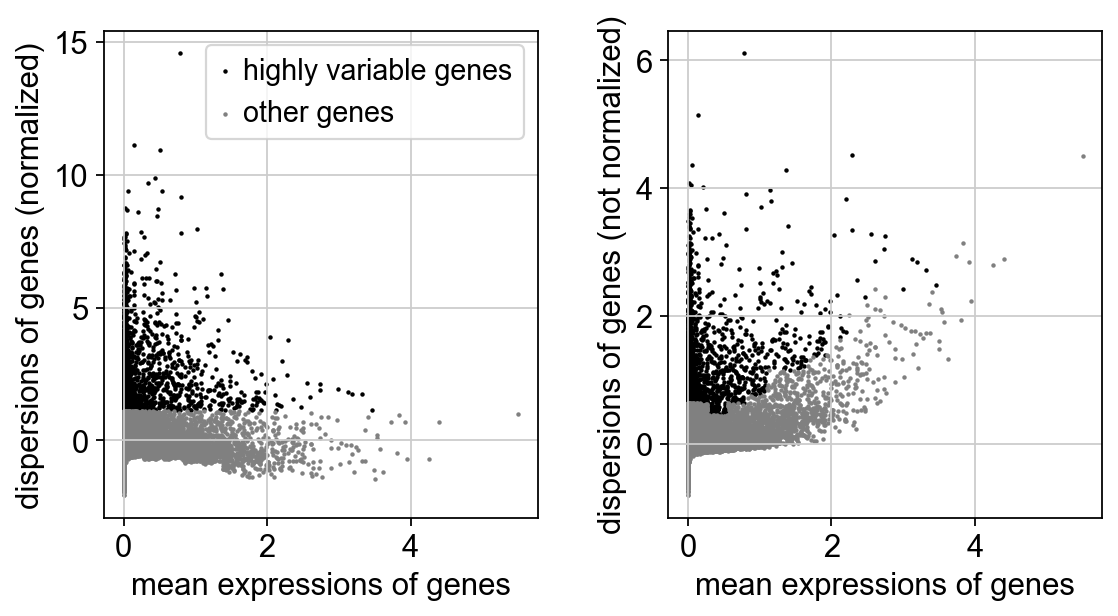

In [11]:
sc.pl.highly_variable_genes(adata)

In [12]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:19)


In [13]:
sc.pp.scale(adata, max_value=10)

In [ ]:
sc.pp.pca(adata, 50)

In [14]:
export_final("dataset/cortex/brain_mouse_scanpy_pca.csv",
             "dataset/cortex/brain_mouse_labels_het.csv"adata)